# First Classification: Logistic Regression from Linear Regression

## How is it used?

### Linear Regression

Trying to find the **relationship**

### Classification

Really more of a "yes" or "no"

> _"You're either with us, or against us"_

## Recall Linear Regression

### Formula

$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = \sum_{i=0}^{N} \beta_i x_i $$

## Classification: Use Logistic Regression

Probability of belonging to a particular group

Transform from linear regression!

$$ \large \hat y = \sum_{i=0}^{N} \beta_i x_i $$

$$\large P = \displaystyle \frac{1}{1+e^{-\hat y}} = \frac{1}{1+e^{-\sum_{i=0}^{N} \beta_i x_i}} $$

$$ \large = \frac{1}{1+e^{-\beta_0}e^{-\beta_1 x_1}\ldots e^{-\beta_N x_N}} $$

## Implementing Logistic Regression

[Let's implement this in another notebook](../../MachineLearning/LogisticRegression/logistic_regression.ipynb)

# Implementing Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import some data to play with
from sklearn import datasets

# For our modeling steps
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Play with some data

In [2]:
# Built in dataset from sklearn
iris = datasets.load_iris()

df = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
)

In [3]:
display(df.head())
display(df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# Note how many different targets there are
df.target.unique()

array([0., 1., 2.])

We can go ahead and explore some graphs to show that it doesn't make sense to do a linear regression


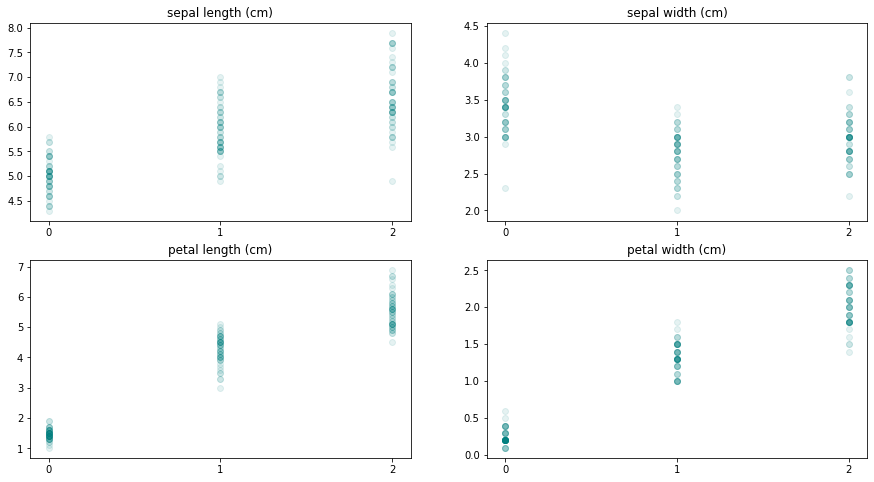

In [5]:
import matplotlib.pyplot as plt

# Creating a large figure
fig = plt.figure(figsize=(15, 8))

# Iterating over the different
for i in range(0, 4):
    # Figure number starts at 1
    ax = fig.add_subplot(2, 2, i+1)
    # Add a title to make it clear what each subplot shows
    plt.title(df.columns[i])
    # Use alpha to better see crossing pints
    ax.scatter(df['target'], df.iloc[:,i], c='teal', alpha=0.1)
    # Only show the tick marks for each target
    plt.xticks(df.target.unique())

## Prepare the data to do the classification

In [6]:
# Get the features and then the target
X = df.iloc[:,:-1]
y = df.target

In [7]:
# Normalize the data to help the model
X = normalize(X)

In [8]:
# Split for test & training  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

## Create the logistic regression model

In [9]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs', multi_class='auto')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

## Evaluate the model

### Training Set

In [11]:
# Was our model correct?
residuals = y_train == y_hat_train

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     117
False      3
Name: target, dtype: int64


In [12]:
print('Percentage of values correctly predicted: ')
print(pd.Series(residuals).value_counts(normalize=True))

Percentage of values correctly predicted: 
True     0.975
False    0.025
Name: target, dtype: float64


### Testing Set

In [13]:
residuals = y_test == y_hat_test

In [14]:
print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     28
False     2
Name: target, dtype: int64


In [15]:
print('Percentage of values correctly predicted: ')
print(pd.Series(residuals).value_counts(normalize=True))

Percentage of values correctly predicted: 
True     0.933333
False    0.066667
Name: target, dtype: float64


# Evaluating Classifications

## Confusion Matrices

[Metrics & Confusion Matrices](../../EvaluatingModels/evaluation_metrics.ipynb)

## ROC & AUC

[ROC Curve & AUC for Evaluation](../../EvaluatingModels/evaluation_curves.ipynb)